# Non-Tree based algorithms

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
grd = pd.read_csv("../data/graphene_data_final.csv")

In [3]:
X = grd[['Graphene_percentage', 'FEED', 'RPM', 'DOC']]  
#X = grd[['FEED', 'DOC']]  
Y = grd['MRR_gm_per_sec']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=1)

In [4]:
reg = LinearRegression().fit(X_train, Y_train)

In [5]:
print(reg.score(X_test,Y_test))

0.814927969191502


In [6]:
print(reg.score(X_test,Y_test))

0.814927969191502


In [7]:
grd

,Graphene_percentage,FEED,RPM,DOC,MRR_gm_per_sec,Ra
0,0.00,100,1000,0.10,0.012697,0.418
1,0.00,100,1000,0.15,0.020327,0.959
2,0.00,100,1000,0.20,0.031002,0.331
3,0.00,100,2000,0.10,0.012720,0.378
4,0.00,100,2000,0.15,0.019914,0.441
...,...,...,...,...,...,...
130,0.03,200,2000,0.15,0.041111,0.708
131,0.03,200,2000,0.20,0.050602,0.586
132,0.03,200,3000,0.10,0.021910,0.906
133,0.03,200,3000,0.15,0.038930,0.927


`grd_norm` is the normalized form of original `grd` dataframe having minimum and maximum 
value 0 and 1 respectively.

In [8]:
grd_norm = (grd-grd.min())/(grd.max()-grd.min())

In [9]:
grd_norm

,Graphene_percentage,FEED,RPM,DOC,MRR_gm_per_sec,Ra
0,0.0,0.0,0.0,0.0,0.139634,0.035925
1,0.0,0.0,0.0,0.5,0.246225,0.187763
2,0.0,0.0,0.0,1.0,0.395366,0.011507
3,0.0,0.0,0.5,0.0,0.139952,0.024698
4,0.0,0.0,0.5,0.5,0.240453,0.042380
...,...,...,...,...,...,...
130,1.0,1.0,0.5,0.5,0.536598,0.117317
131,1.0,1.0,0.5,1.0,0.669192,0.083076
132,1.0,1.0,1.0,0.0,0.268340,0.172888
133,1.0,1.0,1.0,0.5,0.506133,0.178782


In [10]:
X2 = grd_norm[['Graphene_percentage', 'FEED', 'RPM', 'DOC']]  
#X = grd[['FEED', 'DOC']]  
Y2 = grd_norm['MRR_gm_per_sec']
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size = 0.3, random_state=3)

In [11]:
reg2 = LinearRegression().fit(X_train2, Y_train2)

In [12]:
print(reg2.score(X_test,Y_test))

-13867810.470065743


Text(0, 0.5, 'Score')

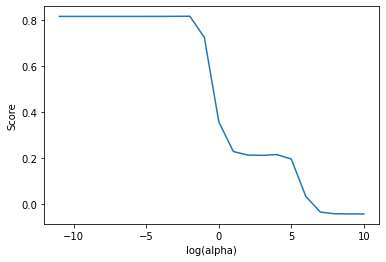

In [13]:
alpha_x = []
score_y = []
for i in range(-11,11):
    ridge_m = Ridge(alpha=10**i).fit(X_train, Y_train)
    alpha_x.append(i)
    score_y.append(ridge_m.score(X_test,Y_test))
plt.plot(alpha_x,score_y)
plt.xlabel("log(alpha)")
plt.ylabel("Score")

In [14]:
Ridge(alpha=10**-5).fit(X_train, Y_train).score(X_test,Y_test)

0.8149331616626572

# Make plots of different hyperparameters and their corresponding model score.

Text(0, 0.5, 'Score')

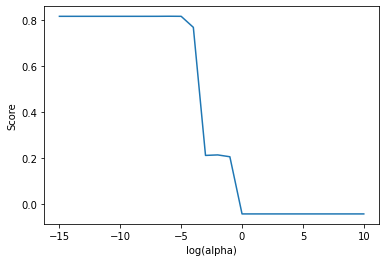

In [15]:
alpha_x = []
score_y = []
for i in range(-15,11):
    ridge_m = Lasso(alpha=10**i).fit(X_train, Y_train)
    alpha_x.append(i)
    score_y.append(ridge_m.score(X_test,Y_test))
plt.plot(alpha_x,score_y)
plt.xlabel("log(alpha)")
plt.ylabel("Score")

In [16]:
Lasso(alpha=(10**-7)).fit(X_train,Y_train).score(X_test,Y_test)

0.8149689491945779

Text(0, 0.5, 'Score')

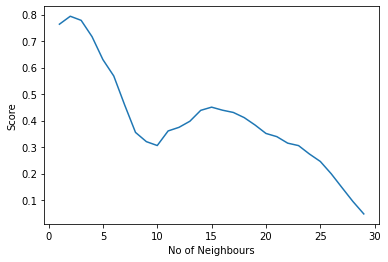

In [17]:
knn_x = []
score_y = []
for i in range(1,30):
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train, Y_train)
    knn_x.append(i)
    score_y.append(knn.score(X_test,Y_test))
plt.plot(knn_x,score_y)
plt.xlabel("No of Neighbours")
plt.ylabel("Score")

In [18]:
KNeighborsRegressor(n_neighbors=2).fit(X_train, Y_train).score(X_test,Y_test)

0.7939939304979726

Text(0, 0.5, 'Score')

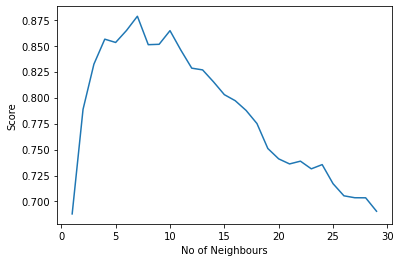

In [19]:
knn_x = []
score_y = []
for i in range(1,30):
    knn2 = KNeighborsRegressor(n_neighbors=i)
    knn2.fit(X_train2, Y_train2)
    knn_x.append(i)
    score_y.append(knn2.score(X_test2,Y_test2))
plt.plot(knn_x,score_y)
plt.xlabel("No of Neighbours")
plt.ylabel("Score")

In [20]:
KNeighborsRegressor(n_neighbors=7).fit(X_train2, Y_train2).score(X_test2,Y_test2)

0.8783455089359131

Text(0, 0.5, 'Score')

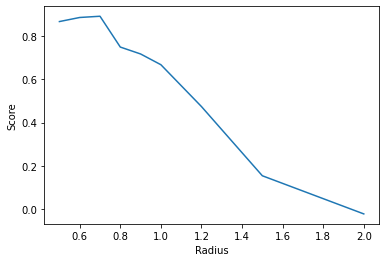

In [21]:
rann_x = []
score_y = []
for i in [0.5,0.6,0.7,0.8,0.9,1,1.2,1.5,2]:
    rann = RadiusNeighborsRegressor(radius=i)
    rann.fit(X_train2, Y_train2)
    rann_x.append(i)
    score_y.append(rann.score(X_test2,Y_test2))
plt.plot(rann_x,score_y)
plt.xlabel("Radius")
plt.ylabel("Score")